In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torchvision

In [2]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        # layer 1
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,stride=1,padding=0 )
        self.batchnorm1 = nn.BatchNorm2d((32))
        self.relu1 = nn.ReLU()
        self.pooling1 = nn.MaxPool2d((2,2))
        # layer 2
        self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1,padding=0)
        self.batchnorm2 = nn.BatchNorm2d((64))
        self.relu2 = nn.ReLU()
        self.pooling2 = nn.MaxPool2d((2,2))
        # layer 3
        self.conv3 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=1,padding=0)
        self.batchnorm3 = nn.BatchNorm2d((128))
        self.relu3 = nn.ReLU()
        self.pooling3 = nn.MaxPool2d((2,2))
        # layer 4
        self.conv4 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3,stride=1,padding=0)
        self.batchnorm4 = nn.BatchNorm2d((256))
        self.relu4 = nn.ReLU()
        self.pooling4 = nn.MaxPool2d((2,2))
        
        # classifier
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(in_features=16384 , out_features=6)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self,input):
        # layer 1
        self.conv1_out = self.conv1(input)
        self.batchnorm1_out = self.batchnorm1(self.conv1_out)
        self.relu1_out = self.relu1(self.batchnorm1_out)
        self.pooling1_out = self.pooling1(self.relu1_out)
        
        # layer 2
        self.conv2_out = self.conv2(self.pooling1_out)
        self.batchnorm2_out = self.batchnorm2(self.conv2_out)
        self.relu2_out = self.relu2(self.batchnorm2_out)
        self.pooling2_out = self.pooling2(self.relu2_out)
        
        # layer 3
        self.conv3_out = self.conv3(self.pooling2_out)
        self.batchnorm3_out = self.batchnorm3(self.conv3_out)
        self.relu3_out = self.relu3(self.batchnorm3_out)
        self.pooling3_out = self.pooling3(self.relu3_out)
        
        # layer 4
        self.conv4_out = self.conv4(self.pooling3_out)
        self.batchnorm4_out = self.batchnorm4(self.conv4_out)
        self.relu4_out = self.relu4(self.batchnorm4_out)
#         self.pooling4_out = self.pooling4(self.relu4_out)
        
        
        # classifier
        self.flatten_out = self.flatten(self.relu4_out)
        self.linear_out = self.linear(self.flatten_out)
        self.sigmoid_out = self.sigmoid(self.linear_out)
        
        output = self.sigmoid_out
        
        return output

In [3]:
mymodel = MyModel()

In [4]:
# 可视化模型
from torchsummary import summary
summary(model=mymodel,input_size=[(3,100,100)],batch_size=1,device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [1, 32, 98, 98]             896
       BatchNorm2d-2            [1, 32, 98, 98]              64
              ReLU-3            [1, 32, 98, 98]               0
         MaxPool2d-4            [1, 32, 49, 49]               0
            Conv2d-5            [1, 64, 47, 47]          18,496
       BatchNorm2d-6            [1, 64, 47, 47]             128
              ReLU-7            [1, 64, 47, 47]               0
         MaxPool2d-8            [1, 64, 23, 23]               0
            Conv2d-9           [1, 128, 21, 21]          73,856
      BatchNorm2d-10           [1, 128, 21, 21]             256
             ReLU-11           [1, 128, 21, 21]               0
        MaxPool2d-12           [1, 128, 10, 10]               0
           Conv2d-13             [1, 256, 8, 8]         295,168
      BatchNorm2d-14             [1, 25

In [4]:
# 数据集
# 使用 torchvision的 datasets.ImageFolder 类 来导入本地数据集
# 使用 torchvision.transform来进行数据增强
# 训练数据集
train_dataset = torchvision.datasets.ImageFolder(root='D:/dataset/fruit_fresh_rotten/train/',
                                                transform=torchvision.transforms.Compose([
                                                    torchvision.transforms.ToTensor(),
                                                    torchvision.transforms.Resize((100,100)),
                                                    torchvision.transforms.RandomHorizontalFlip(),
                                                    torchvision.transforms.RandomRotation(20),
                                                ]))
# 验证数据集
val_dataset = torchvision.datasets.ImageFolder(root='D:/dataset/fruit_fresh_rotten/test/',
                                                transform=torchvision.transforms.Compose([
                                                    torchvision.transforms.ToTensor(),
                                                    torchvision.transforms.Resize((100,100))
                                                ]))


In [5]:
# 数据导入器
# 训练导入器
train_dataloader = torch.utils.data.DataLoader(train_dataset,batch_size=32,shuffle=True)
# 验证导入器
val_dataloader = torch.utils.data.DataLoader(val_dataset,batch_size=32,shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


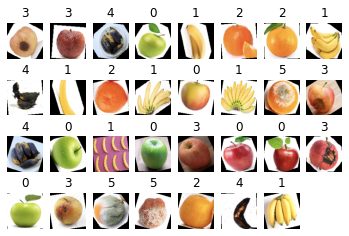

In [7]:
# 可视化 导入器导入的数据
train_iter = iter(train_dataloader)
image,label = train_iter.__next__()
for i in range(31):
    item_image = image[i]
    item_label = label[i]
    item_image = np.transpose(item_image,(1,2,0))
    plt.subplot(4,8,i+1)
    plt.imshow(item_image)
    plt.axis('off')
    plt.title(item_label.item())
plt.show()
plt.close()

In [6]:
# 把数据导入器设置成无限的
def get_infinite_dataloader(dataloader):
    while True:
        for item in dataloader:
            yield item
ifinite_train_dataloader = get_infinite_dataloader(train_dataloader)

In [7]:
# 使用GPU进行训练
# 指定设备
device = torch.device('cuda:0')
# 把模型搬到GPU上
saved_dict = torch.load('mymodel2.pth')
mymodel.load_state_dict(saved_dict)
mymodel.to(device)

MyModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pooling1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pooling2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (pooling3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4

In [8]:
# 训练
total_epoch = 1200
optimizer = torch.optim.Adam(mymodel.parameters(),lr=0.0005)

def train():
    mymodel.train()
    # 取数据
    image,label = ifinite_train_dataloader.__next__()
    # 将数据搬到GPU上
    image = image.to(device)
    
    label = label.to(device)
    # 前向传播计算loss
    output = mymodel(image)
    loss = nn.CrossEntropyLoss()(output,label)
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 每100轮打印 loss
    if i % 100 == 0 :
        # 计算训练集识别准确率（一个batch）
        _,pred = torch.max(output,1)
        correct_item = (pred==label).sum()
        total_item = len(label)
        total_train_accuracy = correct_item / total_item
        print('epoch:',i,'','loss:',loss.item(),'','total_train_accuracy:',total_train_accuracy.item())

        
def val():
    mymodel.eval()
    total_item = 0
    correct_item = 0
    for item in val_dataloader:
        # 取出数据，搬到GPU上
        image,label = item
        image = image.to(device)
        label = label.to(device)
        # 计算模型输出
        output = mymodel(image)
        # 取出最大的输出作为结果
        _,pred = torch.max(output,1)

        # 更新总预测数量
        total_item += label.size(0)
        # 如果相等，则预测正确数量+1
        correct_item += (pred==label).sum()
    total_val_accuracy = correct_item / total_item
    print('epoch:',i,'','total_val_accuracy:',total_val_accuracy.item())

for i in range(total_epoch+1):
    train()
    if i % 400 == 0 :
        val()
# 模型的保存
torch.save(mymodel.state_dict(),'mymodel2.pth')


epoch: 0  loss: 1.209768533706665  total_train_accuracy: 0.875
epoch: 0  total_val_accuracy: 0.8443291783332825
epoch: 100  loss: 1.2216376066207886  total_train_accuracy: 0.8125
epoch: 200  loss: 1.198718786239624  total_train_accuracy: 0.875
epoch: 300  loss: 1.227266550064087  total_train_accuracy: 0.78125
epoch: 400  loss: 1.1595053672790527  total_train_accuracy: 0.90625
epoch: 400  total_val_accuracy: 0.8736101388931274
epoch: 500  loss: 1.2304582595825195  total_train_accuracy: 0.78125
epoch: 600  loss: 1.1512640714645386  total_train_accuracy: 0.90625
epoch: 700  loss: 1.2701746225357056  total_train_accuracy: 0.75
epoch: 800  loss: 1.2339917421340942  total_train_accuracy: 0.8125
epoch: 800  total_val_accuracy: 0.8899185061454773
epoch: 900  loss: 1.1815427541732788  total_train_accuracy: 0.84375
epoch: 1000  loss: 1.233793020248413  total_train_accuracy: 0.84375
epoch: 1100  loss: 1.282334327697754  total_train_accuracy: 0.84375
epoch: 1200  loss: 1.2576510906219482  total_tr